# Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Задачи проекта:

1. Изучить общую информацию о датафрейме.

2. Построить гистограмму для всех числовых столбцов таблицы на одном графике. 

3. Выполнить предобработку данных:
* Найти и изучить пропущенные значения в столбцах: 
* Определить, в каких столбцах есть пропуски. Заполнить пропущенные значения там, где это возможно.
* Рассмотреть типы данных в каждом столбце: Найдити столбцы, в которых нужно изменить тип данных. Преобразовать тип данных в выбранных столбцах.
* Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты. 

4. Добавить в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

5. Провести исследовательский анализ данных. Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

6. Изучить, как быстро продавались квартиры: 
* Построить гистограмму.
* Посчитать среднее и медиану.

7. Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. Изучить, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Построить графики, которые покажут зависимость цены от указанных выше параметров.

8. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

9. Выделить квартиры в Санкт-Петербурге и вычислить их среднюю стоимость на разном удалении от центра. 

10. Сделать общий вывод.

## Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Общая информация о датафрейме

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('//Users/Elena/Desktop/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/Documents/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Исходный датафрейм представляем из себя таблицу из 22 колонок и 23699 строк. Преобладающий тип данных - числа с плавающей запятой (14 колонок). 3 столбца имеют тип данных целые числа, 3 столбца - объект и 2 столбца имеют булевы значения. Уже на первый взгляд видно, что не все типы данных подходят для тех или иных характеристик.
Так же могу отметить, что в данных встречаются аномальные выбросы, например: максимальное значение "floors_total" = 60. Вряд ли в Санкт-Петербурге продаются квартиры на 60-м этаже. 5 балконов - возможно, но так наводит на соменения -  "balcony".

### Предобработка данных

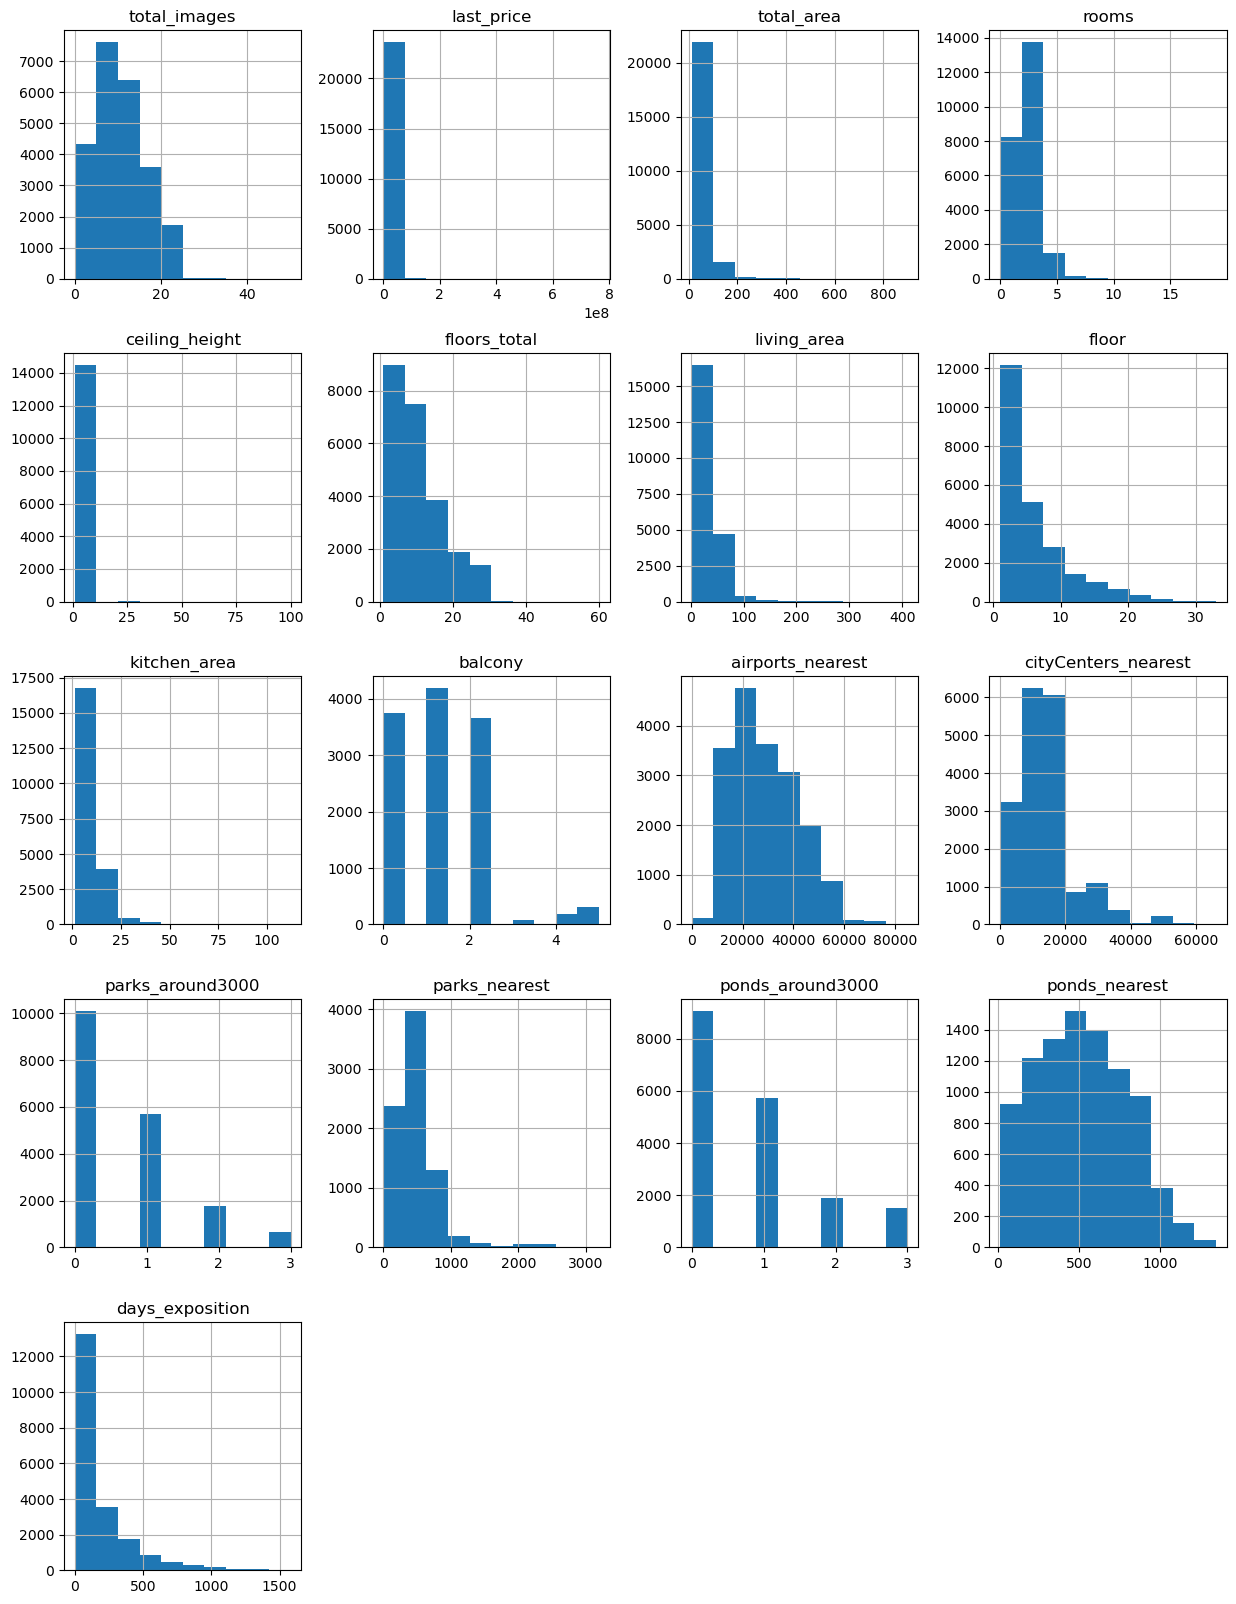

In [5]:
data.hist(figsize=(15, 20));

Для наглядности представления информации построила гистограммы по каждому столбцу. Данные не однородны, практически во всех столбцах всречаются аномальные, выбивающиеся значения (о чём кратко говорила ранее). Это может быть связано с ошибкой, допущенной при вводе данных или единичными случаями, которые существенно не влияют на общую выборку. В дальнейшем их можно будет удалить.

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для точного и релевантного анализа необходимо выяснить количество пропусков в каждом из столбцов. Наибольшее количество пропусков встречается в столбце "is_apartment". Возможно, это связано с растоновкой приоритетов при заполнении информации: наличие фотографий, информации о цене, площади и количестве комнат наиболее важные характеристики для потенциальных покупателей, чем информация является ли объект недвижимости апартаментами или нет. Так же достаточно больше количество пропусков в столбце "balcony". В данном случае предполагаю, что при отсутствии балкона, информация просто не указывалась. Очень большое количество пропусков в столбцах "parks_nearest" и "ponds_nearest". Так же могу предположить, что данная информация не являлась приоритетной при размещении объявления по мнению риэлторов.

In [7]:
data.isnull().sum()/len(data)*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Для большей наглядности выявления пропусков посчитала % пропусков от общих данных таблицы. Пропуски могли появится из-за ошибках при вводе или выгрузке данных, сборе данных из разных источников, из-за отсутствия информаци по данной категории. В общем и целом, таблица достаточно информативна: данные по наиболее приорительным показателям заполнены полностью. В дальнейшем можно будет заменить или удалить часть пропусков, выявить зависимость показателей друг от друга и посчитать корреляцию.

In [8]:
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Переименую несколько столбцов для единообразного внешнего вида таблицы.

In [9]:
data.duplicated().sum()

0

В таблице отсутствуют явные дубликаты.

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Тем не менее встречаются неявные дубликаты в столбце с названием населённых пунктов ('locality_name'), которые можно заменить единым значением.

In [11]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('городской поселок Янино-1', 'городской посёлок Янино-1')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')


def replace_locality_name_1(wrong, correct):
    for wrong in wrong:
        data['locality_name'] = data['locality_name'].replace(wrong, correct)
duplicates = ['поселок Мурино', 'Мурино']
name = 'посёлок Мурино'
replace_locality_name_1(duplicates, name) 

def replace_locality_name_2(wrong, correct):
    for wrong in wrong:
        data['locality_name'] = data['locality_name'].replace(wrong, correct)
duplicates = ['поселок городского типа Рябово', 'поселок Рябово']
name = 'посёлок городского типа Рябово'
replace_locality_name_2(duplicates, name) 

data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В таблице встречаются неявные дубликаты. Их появление может быть связано с ошибкой при вводе данных или выгрузке из разных источников. Удалила несколько неявных дубликатов в столбце "locality_name", заменила на значения единые по смыслу.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna('0').astype('int')
data['locality_name'] = data['locality_name'].fillna('Ленинградская область')
data['parks_around_3000'] = data['parks_around_3000'].fillna('0').astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna('0').astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna('0').astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna('0').astype('int')
data['total_area'] = data['total_area'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.dropna(axis = 'index', subset = ['floors_total'], inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


Для удобства анализа заменила значения в столбце "is_apartment" на "False" (ложь). Если информация о том, является ли объект недвижимости апартаментами или нет, отсутствует, предполагаю, что объект действительно не является апартаментами. Отсутствие данных в столбце "balcony" заменю на "0" - как уже предполагала ранее, возможно, балкон просто отсутствует. Одновременно сделаю замену пропусков на "0" и изменю тип данных на "int" (целые числа, для удобства анализа в дальнейшем) в столбцах "parks_around_3000", "parks_nearest", "ponds_around_3000", "ponds_nearest". Рассуждаем аналогично категории "balcony" - в дальнейшем при проверке гипотиз и поиске зависимости, объекты с нулевым значением просто не попадут в выборку. Так же, чтобы зря не "выкидывать" строки с пропусками в столбце "locality_name", заменю их значением "Ленинградская область" (т.к. изначально мы анализируем рынок недвижимости Санкт-Петербурга и соседних населённых пунктов).
Пришлось удалить строки с пропусками в столбце "floors_total", т.к. данный столбец понадобится в дальнейшем для анализа, ставить рандомные значения в данном случае не корректно.

In [13]:
median_ceiling_height = data.groupby('floors_total')['ceiling_height'].median()
for m_ceiling_height in data['floors_total'].unique():
    data.loc[(data['floors_total'] == m_ceiling_height) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_ceiling_height[m_ceiling_height]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159,2015-07-24,3,2.60,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


In [14]:
median_kitchen_area = data.groupby('rooms')['kitchen_area'].median()
for m_kitchen_area in data['rooms'].unique():
    data.loc[(data['rooms'] == m_kitchen_area) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_kitchen_area[m_kitchen_area]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159,2015-07-24,3,2.60,14.0,NaN,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


Так же возможно заменить пропущенные значения в столбце "kitchen_area". Для этого написала цикл, который вместо пропусков в столбце "kitchen_area" подставляет медианное значение аналогичной категории по столбцу "rooms" (например, пропуск в строке с однокомнатной квартирой, цикл заменяет пропуск медианное значение площади кухни по всем однокомнатным квартирам).

In [15]:
median_living_area = data.groupby('rooms')['living_area'].median()
for m_living_area in data['rooms'].unique():
    data.loc[(data['rooms'] == m_living_area) & (data['living_area'].isna()), 'living_area'] = median_living_area[m_living_area]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000,159,2015-07-24,3,2.60,14.0,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0


Аналогичные действия произвожу для столбцов "living_area" и "ceiling_height" и заменяю пропуски медианными значениями.

In [16]:
data.drop(index=data.query('total_area > 500').index,inplace=True)
data.drop(index=data.query('living_area > 300 | living_area < 10').index,inplace=True)
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('last_price > 5.630000e+08').index,inplace=True)
data.drop(index=data.query('floors_total > 40').index,inplace=True)
data.drop(index=data.query('days_exposition > 360').index,inplace=True)
data.drop(index=data.query('ceiling_height > 3').index,inplace=True)

Удалила аномально большие значения в столбцах с общей площадью квартиры, жилой площадью, аномально большой ценой квартиры, здания выше 40 этажа и отфильтровала только те объявления, которые были размещены не более года.

### Добавление в таблицу новых столбцов

In [17]:
data['price'] = data['last_price'] / data['total_area']
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

data['floor_number'] = 'другой'
data['floor_number'] = data['floor_number'].where(data['floor'] > 1, 'первый')
data['floor_number'] = data['floor_number'].where(data['floor'] < data['floors_total'], 'последний')
data['city_centers_nearest'] = (data['city_centers_nearest']/1000).round()
data['price'] = (data['price']/1000).round()
data['parks_nearest'] = (data['parks_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,day,month,year,floor_number
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,0.482,2,755,NaN,120.0,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,...,0,0.000,0,0,81.0,84.0,1,12,2018,первый
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,0.000,0,0,55.0,96.0,0,9,2018,другой
6,6,3700000,37,2017-11-02,1,2.66,26.0,10.6,6,False,...,0,0.000,0,0,155.0,100.0,3,11,2017,другой
7,5,7915000,71,2019-04-18,2,2.75,24.0,30.5,22,False,...,0,0.000,0,0,NaN,111.0,3,4,2019,другой


Для более полного анализа и выявления в дальнейшем зависимости одних показателей от других, добавлю несколько новых столбцов в таблицу и произведу расчёты. Цена одного квадартного метра: это цена объекта поделённая на общую площадь. Добавлю в формате "int" дни недели, где 0 — понедельник, 1 — вторник и так далее. Так же нам будут интересны значения в столбцах месяц и год размещения объявления. Этаж, на котором расположен объект, так же может повялиять на успешность объявления. Многие покупатели обращают внимание на отдалённость квартиры от центра города. Данные в исходной таблице приведены в метрах, это не очень удобно и не наглядно. Переведём их в киллометры. Так же поступим с расстоянием от аэропорта - пригодится для дальнейшего анализа.

### Исследовательский анализ данных

count    19257.000000
mean        56.231448
std         28.250702
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        500.000000
Name: total_area, dtype: float64

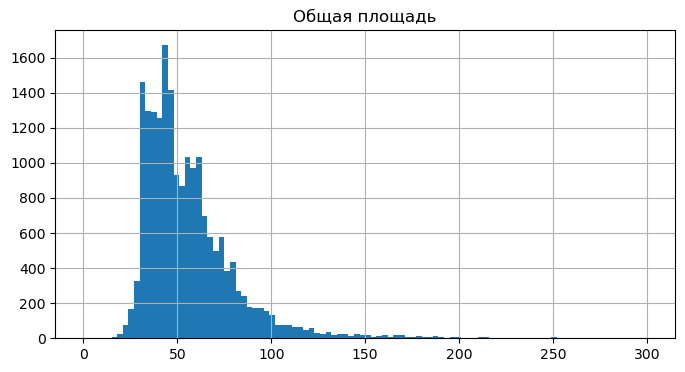

In [18]:
data.hist('total_area', bins=100, range=(0, 300), figsize = (8,4))
plt.title("Общая площадь")
data['total_area'].describe()

После удаления аномально больших площадей (более 500 кв.м.), наибольшая площадь объекта недвижимости составляет 500 кв. м. Тем не менее, это очень большое значение, учитывая, что площадь только 25% объектов выше 65 кв. м, могу предположить, что всё-таки при вводе данных допущены значительные ошибки, либо на рынок попали эксклюзивные предложение. Считаю целесообразным точечно проверить исходные данные на правдоподобность.
Средняя площадь квартир в продаже равняется 56,23 кв.м.

count    19257.000000
mean        31.984822
std         17.198061
min         10.000000
25%         18.000000
50%         30.000000
75%         40.400000
max        264.500000
Name: living_area, dtype: float64

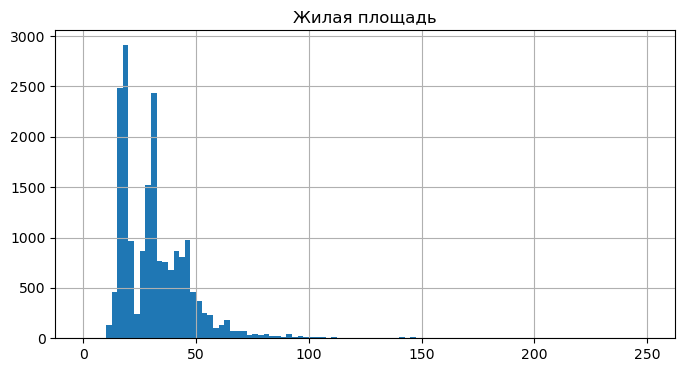

In [19]:
data.hist('living_area', bins=100, range=(0, 250), figsize = (8,4))
plt.title("Жилая площадь")
data['living_area'].describe()

Максимальная жилая площадь в размещённых объявлениях равна 264,5 кв. м. Если принять за истину существование квартиры площадью 500 кв. м., возможно и наличие квартиры с описанной выше жилой площадью. Среднее значение составлет 31,98 кв. м. 
При анализе данных бросалась в глаза минимальная жилая площадь равная 2 кв. м. Решила удалить все значения менее 10 кв.м., предполагаю, что это не возможно даже в новостройках. Считаю ошибкой наличие в выборке объявлений подобного рода. 

count    19086.000000
mean        10.019768
std          4.947714
min          2.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        107.000000
Name: kitchen_area, dtype: float64

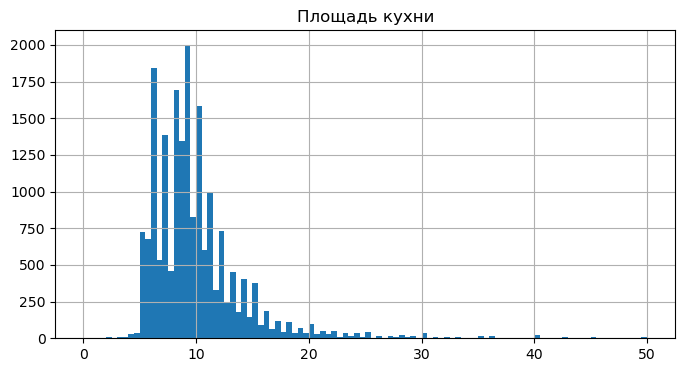

In [20]:
data.hist('kitchen_area', bins=100, range=(0, 50), figsize = (8,4))
plt.title("Площадь кухни")
data['kitchen_area'].describe()

При анализе площади кухни выявлена максимальная площадь кухни, что составляет - 107 кв. м. Оперируя к предыдущим выводам, оставляю данное значаение. Среднее значение площади кухни - 10,01 кв. м.

count    1.925700e+04
mean     5.688072e+06
std      5.953564e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.490000e+06
75%      6.240000e+06
max      2.300000e+08
Name: last_price, dtype: float64

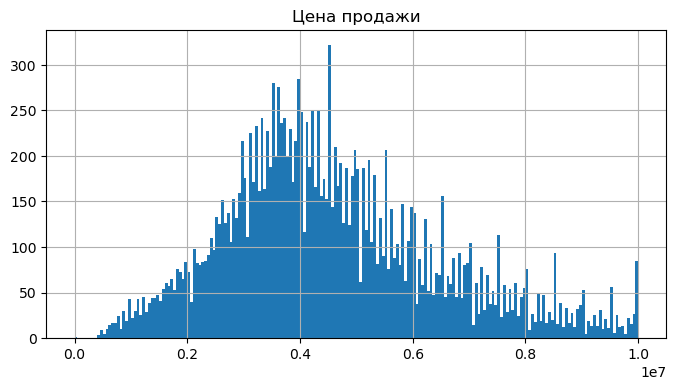

In [21]:
data.hist('last_price', bins=200, range=(0, 10000000), figsize = (8,4))
plt.title("Цена продажи")
data['last_price'].describe()

Максимальная цена выборки составляет 230 млн. руб. Среднее значение стоимости при этом составляет 5 млн. 688 тыс. руб.
75% значений выборки (75% объявлений)  находятся в ценовой категории менее 6 млн. 240 тыс. руб.

count    19257.000000
mean         1.979436
std          0.983713
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

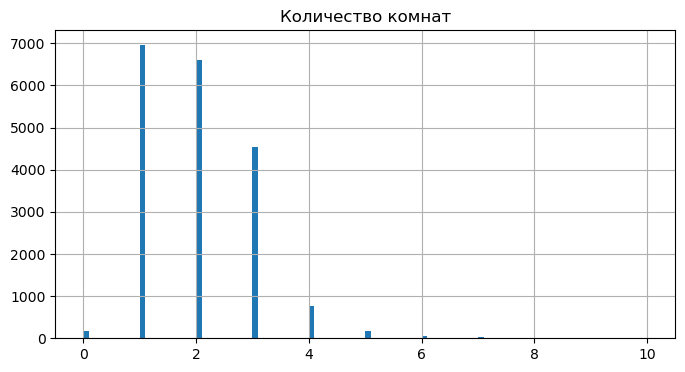

In [22]:
data.hist('rooms', bins=100, range=(0, 10), figsize = (8,4))
plt.title("Количество комнат")
data['rooms'].describe()

Максимальное количество комнат составляет 19 единиц. При наличии большой площади это возможно, не берусь утверждать обратного и удалять данные значения. Среднее значение комнат в продаваемых квартирах равно 2 единицам, что, скорее всего, логично, учитывая среднюю площадь квартир и жилую площадь (информация представлена ранее).

count    19256.000000
mean         2.661471
std          0.146558
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.000000
Name: ceiling_height, dtype: float64

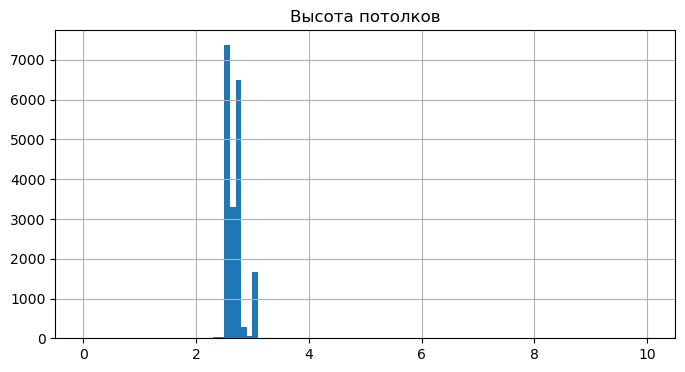

In [23]:
data.hist('ceiling_height', bins=100, range=(0, 10), figsize = (8,4))
plt.title("Высота потолков")
data['ceiling_height'].describe()

Ограничила максимальную высоту потолков в выборке 3 м (реальная высота потолков). Средняя высота потолков составляет 2,66 м - стандарная высота потолков согласно нормативам. 
Опять же бросается в глаза минимальная высота - 1 м. Считаю, что была допущена ошибка, данным значением можно принебречь.

count    19257.000000
mean         6.044348
std          4.954478
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

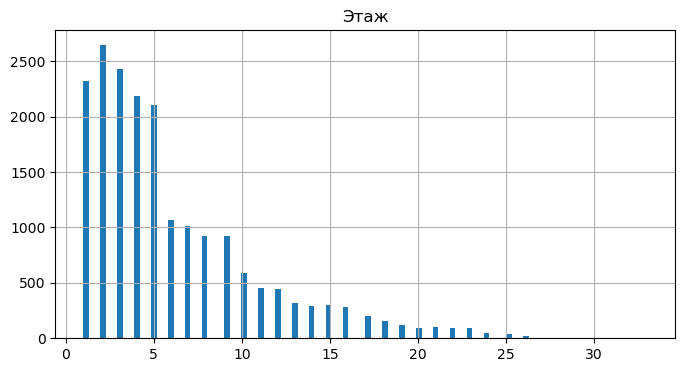

In [24]:
data.hist('floor', bins=100, figsize = (8,4))
plt.title('Этаж')
data['floor'].describe()

75% квартир в выборке находятся ниже 8 этажа. Наибольшей популярностью пользуются 5, 6 и 7 этажи (среднее значение 6,04).

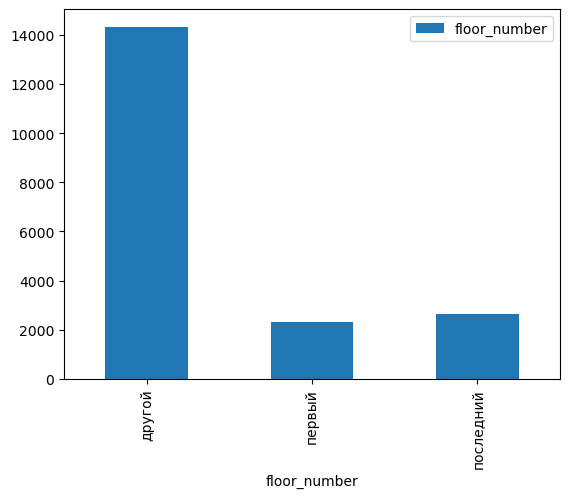

In [25]:
number = data.groupby('floor_number').agg({'floor_number': 'count'})
number.plot(kind = 'bar');

Предыдущий вывод подтверждается гистограммой распределения квартир по этажам "первый", "последний", "другой".

count    19257.000000
mean        11.027315
std          6.638186
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

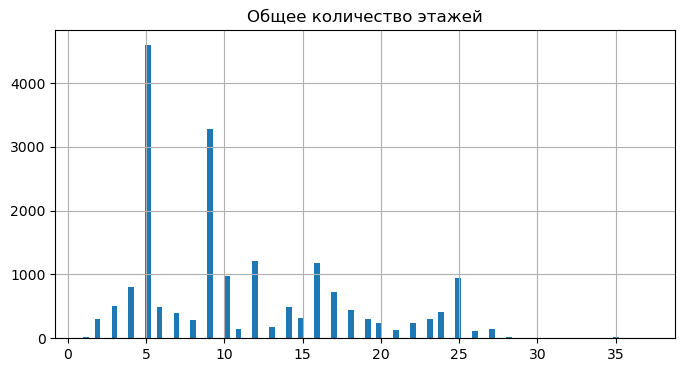

In [26]:
data.hist('floors_total', bins=100, figsize = (8,4))
plt.title("Общее количество этажей")
data['floors_total'].describe()

Средняя этажность зданий, в которых продают квартиры составляет 10 - 11 этажей (среднее значение). В основном здания ниже 16 этажей (3-я квартиль).

count    14487.000000
mean        14.917167
std          8.299468
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

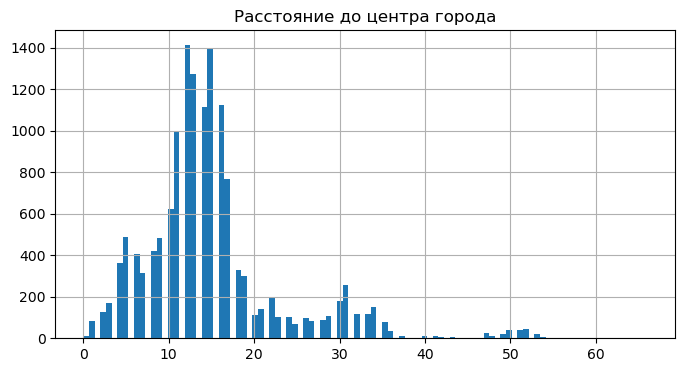

In [27]:
data.hist('city_centers_nearest', bins=100, figsize = (8,4))
plt.title("Расстояние до центра города")
data['city_centers_nearest'].describe()

Максимально отдалённая от центра квартира находится на расстоянии 66,0 км. Это оцень далеко.
В большенстве объявлений продаются квартиры на расстоянии 17 км от центра города. В мегаполисе данная ситуация возможно и объяснима.

count    14469.000000
mean     29114.884512
std      12983.284400
min          0.000000
25%      18012.000000
50%      27701.000000
75%      38128.000000
max      84853.000000
Name: airports_nearest, dtype: float64

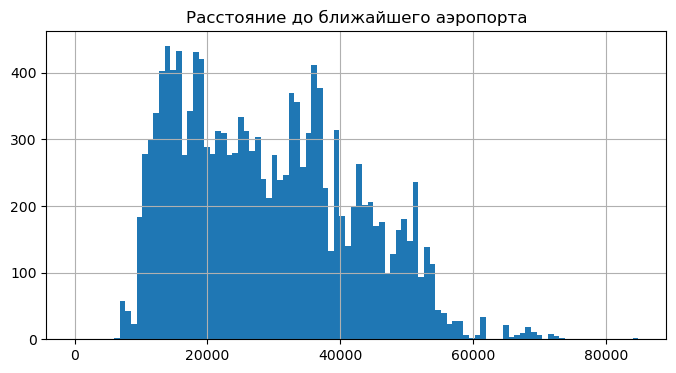

In [28]:
data.hist('airports_nearest', bins=100, figsize = (8,4))
plt.title("Расстояние до ближайшего аэропорта")
data['airports_nearest'].describe()

84,85 км - не такое уж и большое расстояние до аэропорта, хотя и является максимальным. В выборку попал объект со значением 0. Вряд ли продаётся квартира в самом аэропорту. Опять же предположу, что данное значение является ошибкой, мы им пренебрегаем.

count    19257.000000
mean         0.155481
std          0.298804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.251000
max          3.190000
Name: parks_nearest, dtype: float64

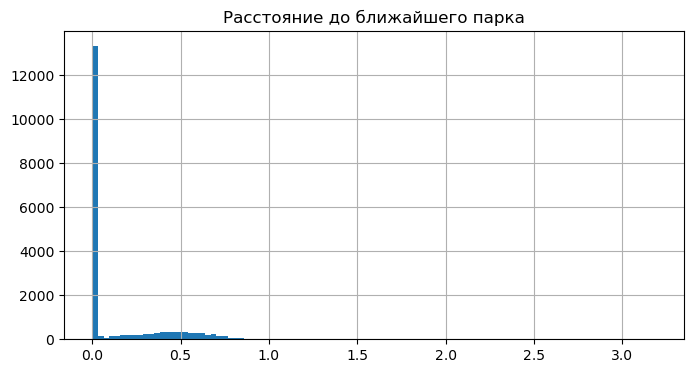

In [29]:
data.hist('parks_nearest', bins=100, figsize = (8,4))
plt.title("Расстояние до ближайшего парка")
data['parks_nearest'].describe()

Практически все квартиры в объявлениях находятся недалеко от какого-либо парка.

count    19257.000000
mean         6.391234
std          3.497287
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

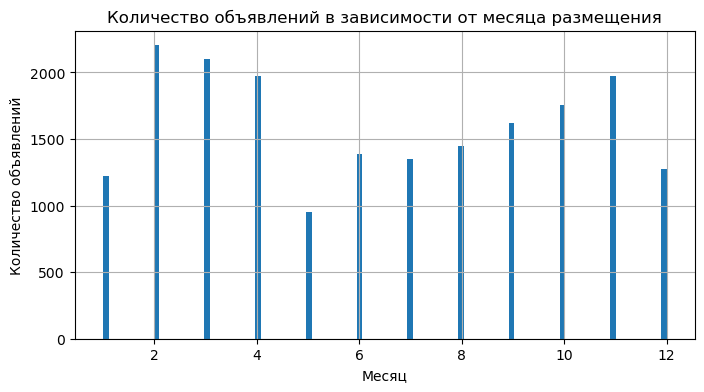

In [30]:
data.hist('month', bins=100, figsize = (8,4))
plt.title("Количество объявлений в зависимости от месяца размещения")
plt.xlabel("Месяц")
plt.ylabel("Количество объявлений")
data['month'].describe()

Большую часть объявлений о продаже размещают до октября. 
Возможно, это связано с общим снижением деловой активности к концу года.
Так же наблюдается "провал" в мае. Скорее всего, это связано с сезоном отпусков и другими приоритетами.

count    19257.000000
mean         2.588617
std          1.800225
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

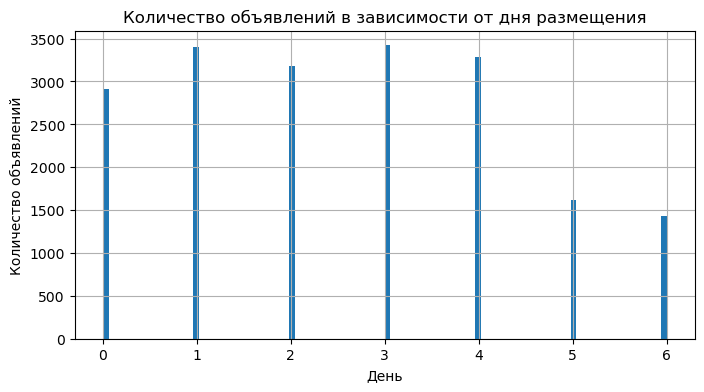

In [31]:
data.hist('day', bins=100, figsize = (8,4))
plt.title("Количество объявлений в зависимости от дня размещения")
plt.xlabel("День")
plt.ylabel("Количество объявлений")
data['day'].describe()

count    16437.000000
mean       102.361806
std         87.570985
min          1.000000
25%         36.000000
50%         72.000000
75%        150.000000
max        359.000000
Name: days_exposition, dtype: float64

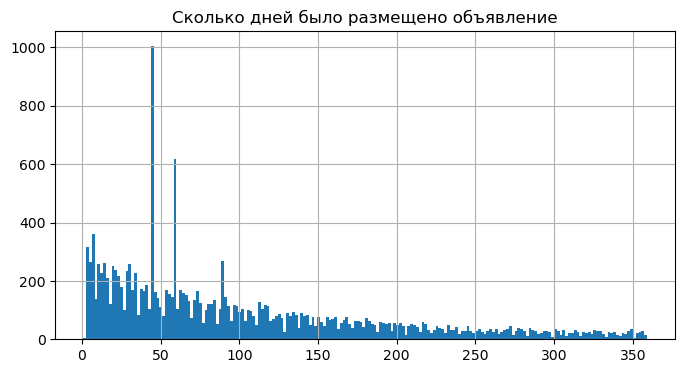

In [32]:
data.hist('days_exposition', bins=200, figsize = (8,4))
plt.title('Сколько дней было размещено объявление')
data['days_exposition'].mean()
data['days_exposition'].median()
data['days_exposition'].describe()

В среднем объявление о продаже размещено 102 дня - это достаточное время для поиска покупателей и продажи квартиры по заявленной цене.
На стадии получения информации были выявлены необычно долгие продажи в 1580 месяцев.
Причины появления подобной цифры могут быть разные: риэлтор забыл снять объявление о продаже, цена сильно завышена, состояние объекта недвижимости не соответствует ожиданиям.
Ограничила выборку 365 днями.
Выбросы в районе 45 и 60 дней возможно связаны со снижением цены продажи объекта.

0.7249867486017476

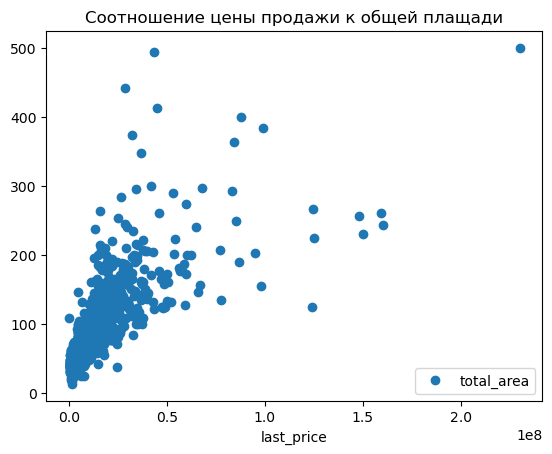

In [33]:
data.pivot_table(index='last_price', values='total_area').plot(style='o')
plt.title("Соотношение цены продажи к общей плащади")
data['last_price'].corr(data['total_area'])

Цена квартиры определённо зависит от её общей площади. Коэффициент корреляции равен 0,72.
На представленной диаграмме видно, что тем ниже цена, чем меньше площадь. 

0.6007435825114282

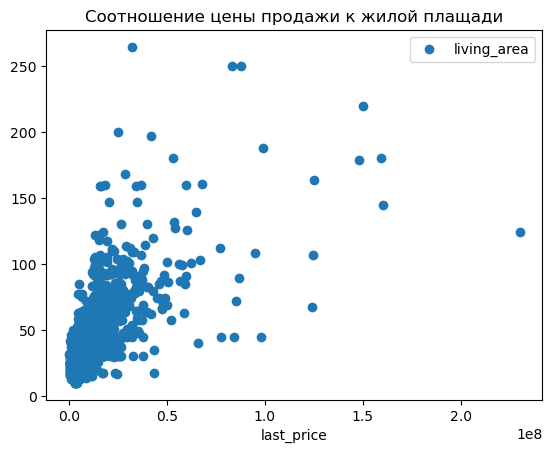

In [34]:
data.pivot_table(index='last_price', values='living_area').plot(style='o')
plt.title("Соотношение цены продажи к жилой плащади")
data['last_price'].corr(data['living_area'])

Общая стоимость квартиры так же достаточно сильно коррелируется с жилой площадью квартиры, но уже не так сильно, как с общей площадью. Коэффициент корреляции равен 0,60.

0.518266023542206

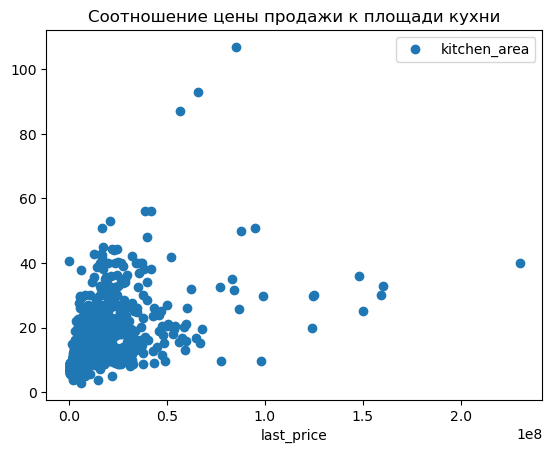

In [35]:
data.pivot_table(index='last_price', values='kitchen_area').plot(style='o')
plt.title("Соотношение цены продажи к площади кухни")
data['last_price'].corr(data['kitchen_area'])

Корреляция в 0,51 говорит о наличии связи между ценой на квартиру и площадью кухни, однако не слишком сильной. 
Судя по всему, размер кухни - не ключивой момент в процессе принятия решения о покупке.

0.41287021404633106

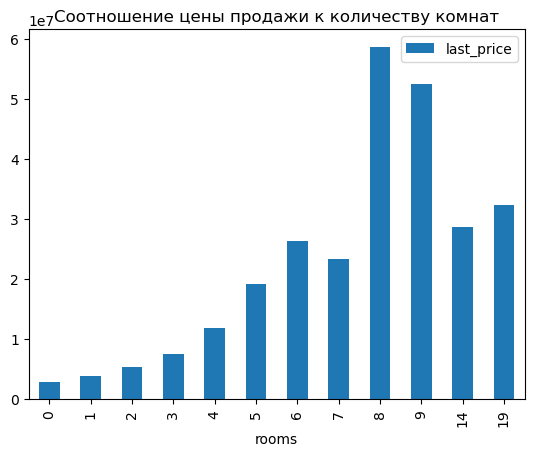

In [36]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')
plt.title("Соотношение цены продажи к количеству комнат")
data['last_price'].corr(data['rooms'])

Судя по графику, дороже всего стоят квартиры с восьмью и девятью комнатами.
Зависимость цены от количества комнат низкая, много ниже зависимости цены от общей площади.
Люди готовы делать перепланировки при совпадении всех осальных параметров.

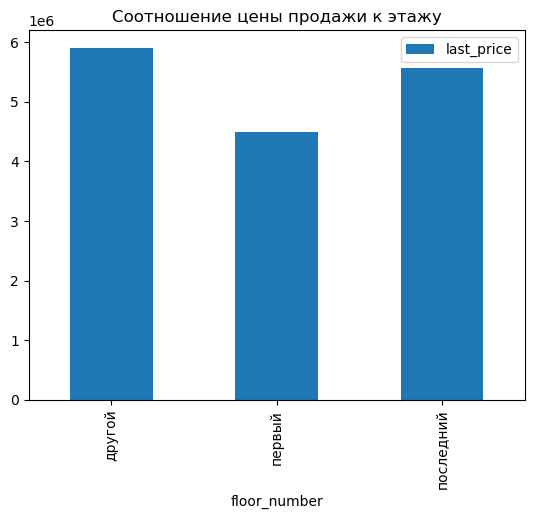

In [37]:
data.pivot_table(index='floor_number',values='last_price').plot(y='last_price', kind='bar')
plt.title("Соотношение цены продажи к этажу");

Менее всего люди хотят покупать квартиры на первом этаже. Скорее всего именно этим обусловлено снижение цены на данную категорию.

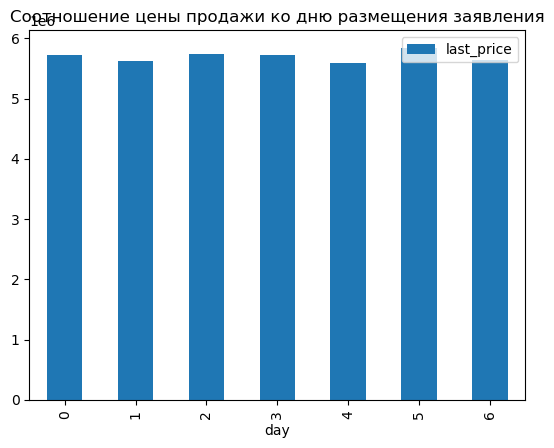

In [38]:
data.pivot_table(index='day',values='last_price').plot(y='last_price', kind='bar')
plt.title("Соотношение цены продажи ко дню размещения заявления");

Цена не зависит от дня размещения объявления.

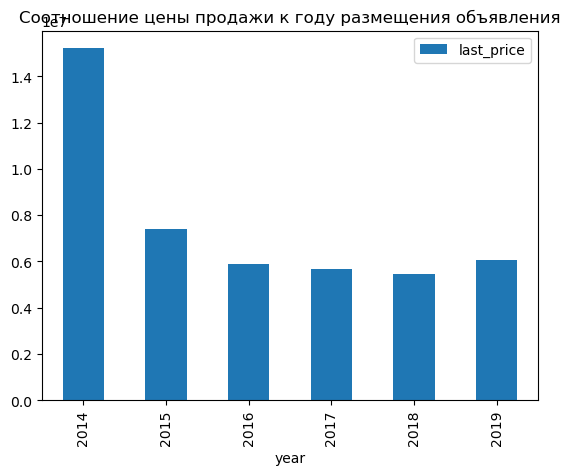

In [39]:
data.pivot_table(index='year',values='last_price').plot(y='last_price', kind='bar')
plt.title("Соотношение цены продажи к году размещения объявления");

Судя по таблице, наибольшая цена на недвижимость была в 2014 году. 
Возможно, это было связано с экономическим кризисом и резким ростом цен на внутреннем рынке (в т.ч. и на недвижимость), либо наличием в таблице эксклюзивных предложений, которые при прочих равных параметрах повышали общие цены в выборке.
Стабилизация цен наблюдается с 2016 года. 

In [40]:
locality_mean_price_10 = data['locality_name'].value_counts().head(10)
locality_mean_price_10 = data.query('locality_name in (@locality_mean_price_10.index)').pivot_table(values='price', index='locality_name')
locality_mean_price_10.sort_values('price', ascending=False)

,price
locality_name,
Санкт-Петербург,111.804287
Пушкин,102.593548
деревня Кудрово,93.306202
посёлок Парголово,90.292683
посёлок Мурино,86.959847
посёлок Шушары,79.243590
Колпино,75.622896
Всеволожск,69.364706
Гатчина,69.333333


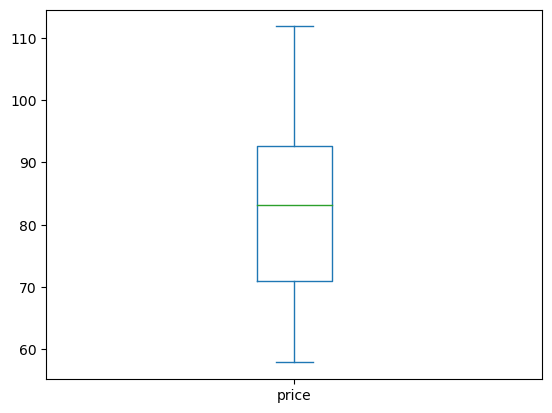

In [41]:
locality_mean_price_10['price'].plot(kind = 'box');

Для расчёта средней цены одного квадратного метра в 10 населённых пунктах с самым большим количеством объвлений, для начала отсортирую все объявления по убыванию и "отсеку" 10 первых.
Далее делаю срез, в котором значения столбца "locality_name" равны элементам списка locality_mean_price_10.
И составляю сводную таблицу из цены за 1 кв. м и местоположения квартиры в объявлении.
Сортирую по убыванию все 10 значений для наглядности.
Итого: наибольшая цена 1 кв. м. ожидаемо в Санкт-Петербурге - 115 тыс. руб. за 1 кв.м. Не сильно отстаёт г. Пушкин - 103 тыс. руб. за кв. м. Скорее всего это связано с близостью населённого пункта к северной столице и большим историческим наследием.
Наименьшая цена 1 кв. м. в Выборге.

In [42]:
data_1_km = data.query('locality_name == "Санкт-Петербург"')
data_1_km['price_1_km'] = data_1_km['last_price'] / data_1_km['price']
data_1_km.pivot_table(index='city_centers_nearest', values='price_1_km', aggfunc='mean')


/var/folders/xb/m0yhjcq17ls7h_7n5_5v8c700000gn/T/ipykernel_4940/258293804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_km['price_1_km'] = data_1_km['last_price'] / data_1_km['price']


,price_1_km
city_centers_nearest,
0.0,150112.878724
1.0,102989.268381
2.0,89299.957895
3.0,84235.672460
4.0,82892.707850
5.0,85151.281584
6.0,75833.098509
7.0,76130.387562
8.0,67462.444544


В таблице представлены данные о средней стоимости каждого километра до центра города. Наиболее высокая стоимость 1 км до 8 км от центра города. Это объяснимо тем, что основная инфраструктура любого города расположена в центре.
Санкт-Петербург отличается богатой историей и большим количеством достопримечательностей, жить в историческом центре ещё и престижно.

### Общий вывод

В результате работы над данными могу сделать следующие выводы: данные представлены не однородные, встречается большое количество пропусков и неявных дубликатов. Выбросы (аномально большие или малые значения) могут исказить результаты и привести к ошибочным выводам. 
Недочёты в формировании базы данных могли возникнуть в связи с невнимательностью при первичном вводе данных, сборе данных из разных источников или отсутствии сегментации рынка, что привело к попаданию в выборку эксклюзивных предложений по цене и площади.
В процессе работы над базой данных были выявлены и удалены пропуски, заменены неявные дубликаты, для удобства расчётов и предоставления данных добавлены столбцы со стоимостью одного квадратного метра, днём, месяцем и годом публикации объявления, определены этаж, на которых располагаются объекты.
Выводы:
1. В основном на продажу выставлены 2-х и 3-х комнатные квартиры на 8 этаже и ниже;
2. Меньше всего квартир расположено на первом этаже (этим можно объяснить низкий спрос на эти квартиры);
3. Наибольшая активность при продаже квартир наблюдается в начале и в конце года;
4. Срок продажи квартиры в среднем составляет 3 - 3,5 месяца;
5. Цена имеет прямую зависимость как от общей площади квартиры, так и от жилой - тем ниже цена, чем меньше площадь;
6. Чем ближе расположение квартиры к центру, тем она дороже.